In [16]:
%pip install Historic-Crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Retrieve BTC/USD dataset
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

df = HistoricalData('BTC-USD',86400,'2016-01-01-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2016-01-01T00:00:00
Provisional End: 2016-10-27T00:00:00
Data for chunk 1 of 9 extracted
Provisional Start: 2016-10-27T00:00:00
Provisional End: 2017-08-23T00:00:00
Data for chunk 2 of 9 extracted
Provisional Start: 2017-08-23T00:00:00
Provisional End: 2018-06-19T00:00:00
Data for chunk 3 of 9 extracted
Provisional Start: 2018-06-19T00:00:00
Provisional End: 2019-04-15T00:00:00
Data for chunk 4 of 9 extracted
Provisional Start: 2019-04-15T00:00:00
Provisional End: 2020-02-09T00:00:00
Data for chunk 5 of 9 extracted
Provisional Start: 2020-02-09T00:00:00
Provisional End: 2020-12-05T00:00:00
Data for chunk 6 of 9 extracted
Provisional Start: 2020-12-05T00:00:00
Provisional End: 2021-10-01T00:00:00
Data for chunk 7 of 9 extracted


In [18]:
import pandas as pd

# Add day column by weekday of DatetimeIndex attribute
# 0: Monday - 6: Sunday
df['day'] = df.index.weekday

In [19]:
# Calculate RSI(Relative Strength Index:相対力指数)
# (A / (A + B) ) * 100
# A: Total increase for 14 days / B: Total decrease for 14 days

# Difference from the previous day
df['diff'] = df['close'].diff()

# Check the value
df_up, df_down = df['diff'].copy(), df['diff'].copy()
df_up[df_up < 0] = 0      # Assign 0 if less than 0
df_down[df_down > 0] = 0  # Assign 0 if greater than 0

# Calculate the average of the 14-day increase
df_up_14 = df_up.rolling(window = 14, center = False).mean()
# Calculate the average of the 14-day decrease
df_down_14 = abs(df_down.rolling(window = 14, center = False).mean())

# Assign RSI
df['rsi'] = (df_up_14 / (df_up_14 + df_down_14)) * 100


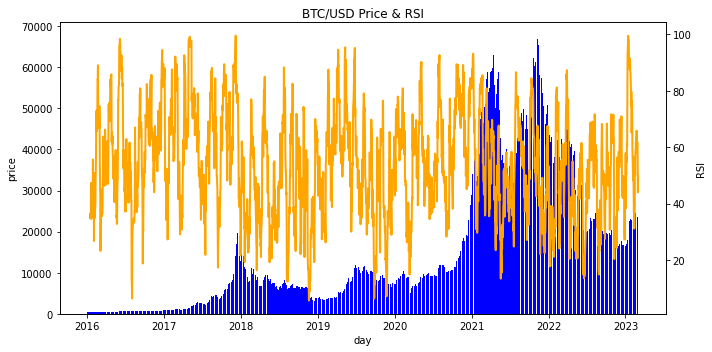

,low,high,open,close,volume,day,diff,rsi
time,,,,,,,,
2016-01-02,432.41,437.56,435.67,435.40,3276.709621,5,NaN,NaN
2016-01-03,425.02,435.75,435.40,431.91,3904.335318,6,-3.49,NaN
2016-01-04,431.37,435.79,431.90,433.85,5894.445723,0,1.94,NaN
2016-01-05,430.00,435.64,433.84,433.34,5150.109476,1,-0.51,NaN
2016-01-06,428.15,433.46,433.32,430.87,5476.959959,2,-2.47,NaN


In [20]:
# Visualize the data set
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title(r'BTC/USD Price & RSI')
plt.rcParams['figure.figsize'] = (10 ,5)

c1,c2 = "blue","orange"  
l1,l2 = "BTC/USD","RSI"

ax1.set_xlabel('day')
ax1.set_ylabel('price')
ax2.set_ylabel('RSI')

ax1.bar(df.index, df['close'], color=c1, label=l1)
ax2.plot(df.index, df['rsi'], color=c2, label=l2, linewidth=2)

fig.tight_layout()
plt.show()
df.head()

In [31]:
# Pre-process for missing values

# Find missing valuies from each angle
print(df.isnull().any())
print(df.isnull().any(axis=1))

# Replace the missing value with a value of next data
df.fillna(method='bfill', inplace=True)

# Assing zero to diff of 1st row
df.loc['2016-01-02', 'diff'] = 0

low       False
high      False
open      False
close     False
volume    False
day       False
diff      False
rsi       False
dtype: bool
time
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
2016-01-06    False
              ...  
2023-02-26    False
2023-02-27    False
2023-02-28    False
2023-03-01    False
2023-03-02    False
Length: 2617, dtype: bool


In [32]:
# Check data set again
df.head(20)

,low,high,open,close,volume,day,diff,rsi
time,,,,,,,,
2016-01-02,432.41,437.56,435.67,435.40,3276.709621,5,0.00,36.209544
2016-01-03,425.02,435.75,435.40,431.91,3904.335318,6,-3.49,36.209544
2016-01-04,431.37,435.79,431.90,433.85,5894.445723,0,1.94,36.209544
2016-01-05,430.00,435.64,433.84,433.34,5150.109476,1,-0.51,36.209544
2016-01-06,428.15,433.46,433.32,430.87,5476.959959,2,-2.47,36.209544
2016-01-07,430.64,460.15,430.66,459.07,13907.201729,3,28.20,36.209544
2016-01-08,447.53,464.40,459.07,454.44,8347.095040,4,-4.63,36.209544
2016-01-09,447.66,456.00,454.41,450.38,4247.639651,5,-4.06,36.209544
2016-01-10,442.96,451.39,450.39,449.99,3954.322400,6,-0.39,36.209544


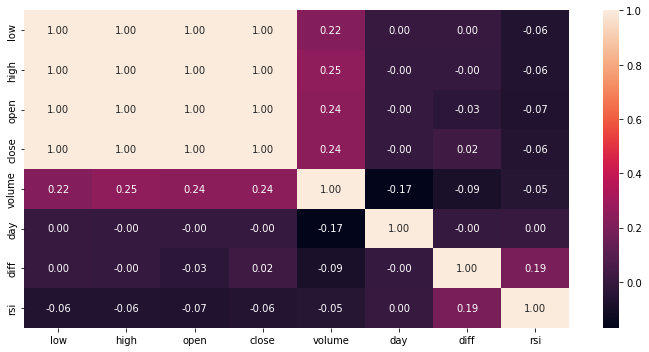

In [33]:
# Check correlation of data set just beacuse.
import numpy as np
import seaborn as sns

corr = np.corrcoef(df.values.T)

m   = sns.heatmap(
                 corr,                         
                 annot=True,                   
                 fmt='.2f',                    
                 annot_kws={'size': 10},       
                 yticklabels=list(df.columns), 
                 xticklabels=list(df.columns)) 

plt.tight_layout()
plt.show()

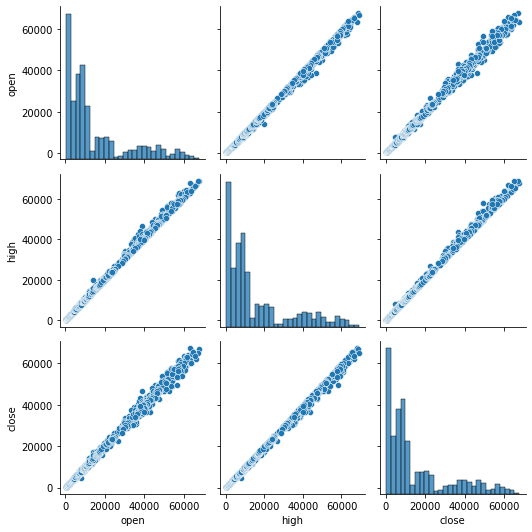

In [34]:
# Visualize the objective variable ('close') and the four selected variables as a scatter plot
sns.pairplot(df[['open', 'high', 'close']])
plt.tight_layout()
plt.show()



In [35]:
# Multi-regression analysis

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# No Standardization code
X = df[['open', 'high']].values              # Explanatory variable
y = df['close'].values                              # Objective variable
'''
# Standardization
sc = StandardScaler()
X = df.loc[:, ['open', 'high']]              # Explanatory variable
y = df['close'].values                              # Objective variable
X = sc.fit_transform(X)
'''

# Divide the data set into training data set and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicted value with train data
y_train_pred = model_multi.predict(X_train)

# Predicted value with test data
y_test_pred  = model_multi.predict(X_test)

       open     high
0 -0.109365  1.07848
Intercept: 21.30


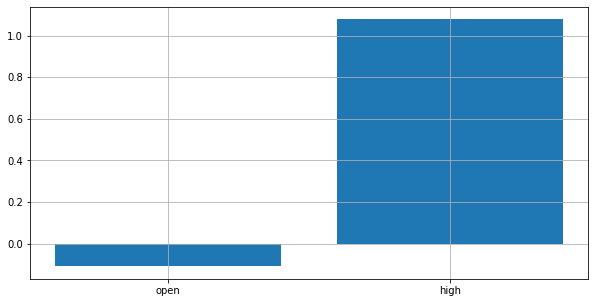

In [37]:
df_coef = pd.DataFrame(model_multi.coef_.reshape(1,2), 
                       columns=['open', 'high'])
print(df_coef)

print('Intercept: %.2f' % model_multi.intercept_)

num = len(df_coef.columns)

plt.bar(df_coef.columns, model_multi.coef_)
plt.xticks(np.arange(num), df_coef.columns)
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import r2_score            # R^2
from sklearn.metrics import mean_squared_error  # RMSE

# RMSE:平均平方二乗誤差
print('RMSE Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), 
        mean_squared_error(y_test, y_test_pred, squared=False)    
      ))

# R^2:決定係数
print('R^2 Train: %.2f, Test: %.2f' % (
        r2_score(y_train, y_train_pred), 
        r2_score(y_test, y_test_pred)    
      ))


RMSE Train: 578.40, Test: 564.30
R^2 Train: 1.00, Test: 1.00


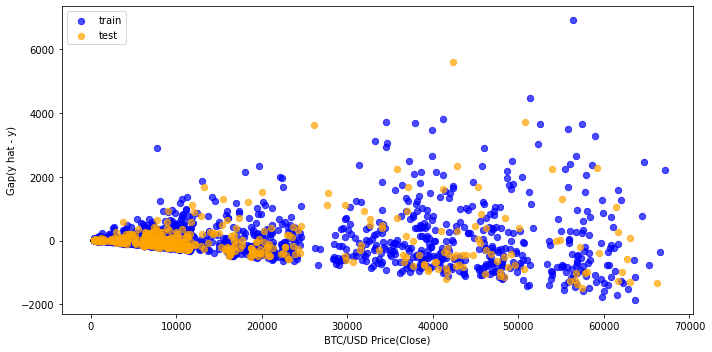

In [39]:
# Plot predictions and gap with the train data
plt.scatter(y_train_pred,             # x-axis value of graph (predicted value)
            y_train_pred - y_train,   # y-axis value of graph (gap y hat - y)
            c='blue',                 
            marker='o',               
            s=40,                     
            alpha=0.7,                
            label='train')         


# Plot predictions and gap with the test data
plt.scatter(y_test_pred,            
            y_test_pred - y_test, 
            c='orange',
            marker='o', 
            s=40,
            alpha=0.7,
            label='test')

plt.xlabel('BTC/USD Price(Close)')
plt.ylabel('Gap(y hat - y)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
plt.tight_layout()
plt.show()

In [40]:
# BTC/USD at Feb 21, 2023
# open 24,833.05
# high 25,126.85
# close 24,436.35
# source https://finance.yahoo.com/quote/BTC-USD/history/

open = 24833.05
high = 25126.85	
close = 24436.35

y_test_pred  = model_multi.predict([[open, high]])
print('Residual：{:.2f}'.format(close - float(y_test_pred)))

Residual：32.11



**Conclusion**
1.   'high' could be not best choice for an explanatory variable since it would not be unveil when an user want to predict the close price.
2.   I'd say there could be a regularity between 'close' and 'day' somehow. 
3.   In the first place, it would be better to use an other model because of this data set is time-series data.



